In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
filename = '/Users/ola/dev/eit/data/signDatabasePublicFramesOnly/vid6/frameAnnotations-MVI_0071.MOV_annotations/stop_1323896946.avi_image13.png'
img = cv2.imread(filename, cv2.IMREAD_COLOR)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

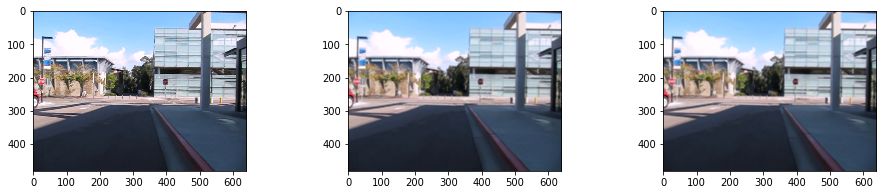

In [4]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5),np.float32)/25
img_blurred = cv2.filter2D(img,-1,kernel)
RGB_blurred = cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB)
img_blurred2 = cv2.blur(img, (3,3))
RGB_blurred2 = cv2.cvtColor(img_blurred2, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(16,10))
plt.subplot(331)
plt.imshow(RGB_img)
plt.subplot(332)
plt.imshow(RGB_blurred)
plt.subplot(333)
plt.imshow(RGB_blurred)

In [5]:
rgb = RGB_img/255.0 # Convert to floating-point to prevent overflow
# Compute distance in RGB space to strong red
difference = rgb - np.array([1.0,0.0,0.0])
distance = np.linalg.norm(difference, axis=2) # Euclidean length (L2 norm)of the third dimension (rgb difference)
thresholded = distance < 0.7 # Isolate pixels that are sufficiently close to strong red

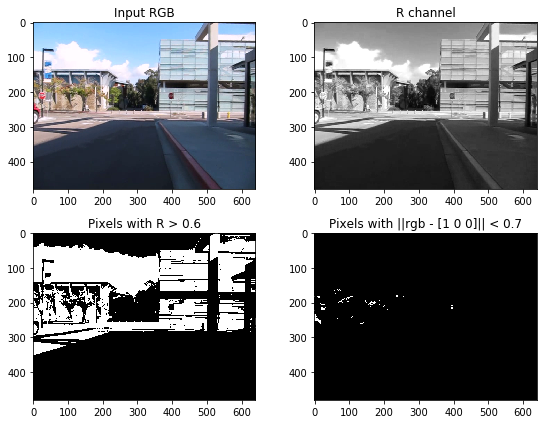

In [6]:
plt.figure(figsize=(8,6))
plt.subplot(221)
plt.imshow(rgb)
plt.title('Input RGB')
plt.subplot(222)
plt.imshow(rgb[:,:,0], cmap='gray')
plt.title('R channel')
plt.subplot(223)
plt.imshow(rgb[:,:,0] > 0.6, cmap='gray')
plt.title('Pixels with R > 0.6')
plt.subplot(224)
plt.imshow(thresholded, cmap='gray')
plt.title('Pixels with ||rgb - [1 0 0]|| < 0.7')
plt.tight_layout()
plt.show()

In [15]:
hsv = cv2.cvtColor(img_blurred, cv2.COLOR_BGR2HSV)
hls = cv2.cvtColor(img_blurred, cv2.COLOR_BGR2HLS)

low_red1 = np.array([161, 145, 20])
high_red1 = np.array([179, 255, 255])
red_mask1 = cv2.inRange(hsv, low_red1, high_red1)

low_red2 = np.array([0, 145, 50])
high_red2 = np.array([21, 255, 255])
red_mask2 = cv2.inRange(hsv, low_red2, high_red2)

low_red3 = np.array([161, 20, 125])
high_red3 = np.array([179, 155, 255])
red_mask3 = cv2.inRange(hls, low_red3, high_red3)

low_red4 = np.array([0, 50, 125])
high_red4 = np.array([21, 155, 255])
red_mask4 = cv2.inRange(hls, low_red4, high_red4)

red_mask = (red_mask1 + red_mask2 + red_mask3 + red_mask4)

low_white = np.array([0, 0, 0])
high_white = np.array([180, 20, 255])
white_mask = cv2.inRange(hsv, low_white, high_white)

In [16]:
img_red_cnt = cv2.imread(filename, cv2.IMREAD_COLOR)
ret, thresh = cv2.threshold(red_mask, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    [x,y,w,h] = cv2.boundingRect(cnt)
    w_n = w / np.sqrt(w**2 + h**2)
    h_n = h / np.sqrt(w**2 + h**2)
    if (np.sqrt(w**2 + h**2) > 2):# and (np.sqrt(w_n**2 - h_n**2) < 0.8):
        cv2.rectangle(img_red_cnt ,(x-5,y-5),(x+w+5,y+h+5),(0,0,255),2)

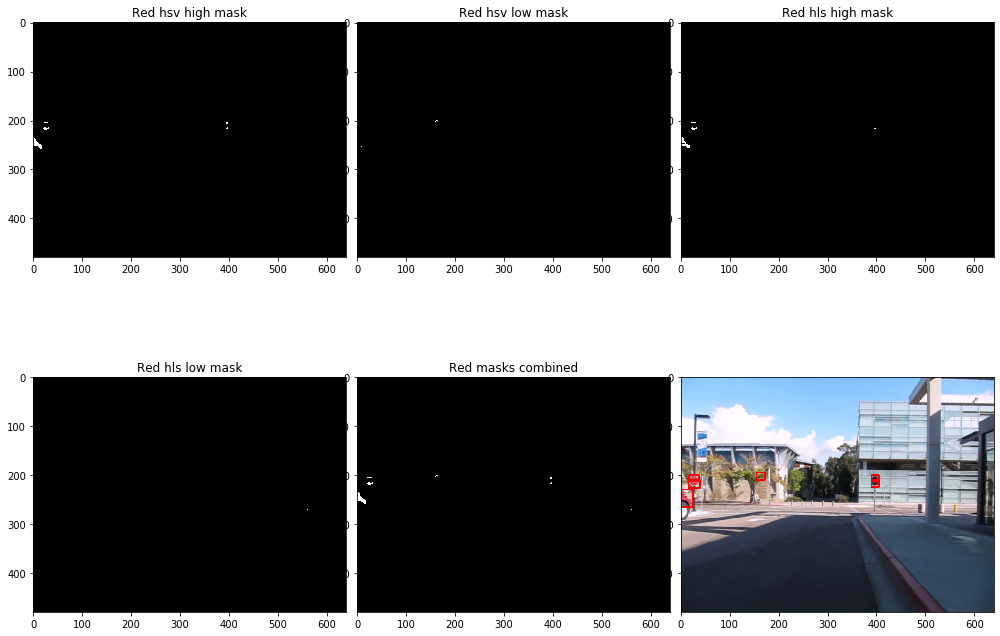

In [17]:
plt.figure(figsize=(14,10))
plt.subplot(231)
rgb_white = cv2.cvtColor(red_mask1, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_white)
plt.title('Red hsv high mask')
plt.tight_layout()
plt.subplot(232)
plt.imshow(cv2.cvtColor(red_mask2, cv2.COLOR_BGR2RGB))
plt.title('Red hsv low mask')
plt.subplot(233)
plt.imshow(cv2.cvtColor(red_mask3, cv2.COLOR_BGR2RGB))
plt.title('Red hls high mask')
plt.subplot(234)
plt.imshow(cv2.cvtColor(red_mask4, cv2.COLOR_BGR2RGB))
plt.title('Red hls low mask')
plt.subplot(235)
plt.imshow(cv2.cvtColor(red_mask, cv2.COLOR_BGR2RGB))
plt.title('Red masks combined')
plt.subplot(236)
plt.imshow(cv2.cvtColor(img_red_cnt, cv2.COLOR_BGR2RGB))
plt.show()

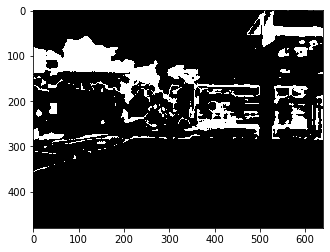

In [18]:
plt.imshow(cv2.cvtColor(white_mask, cv2.COLOR_BGR2RGB))

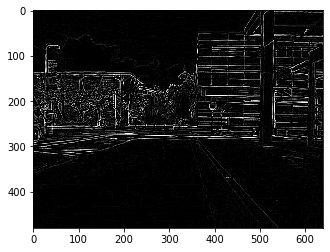

In [241]:
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=np.float32)
# do the laplacian filtering as it is
# well, we need to convert everything in something more deeper then CV_8U
# because the kernel has some negative values,
# and we can expect in general to have a Laplacian image with negative values
# BUT a 8bits unsigned int (the one we are working with) can contain values from 0 to 255
# so the possible negative number will be truncated
#img[np.all(img == 255, axis=2)] = 0
imgLaplacian = cv2.filter2D(img, cv2.CV_32F, kernel)
imgLaplacian = np.clip(imgLaplacian, 0, 255)
imgLaplacian = np.uint8(imgLaplacian)

img_laplacian = cv2.cvtColor(imgLaplacian, cv2.COLOR_BGR2GRAY)
plt.imshow(img_laplacian, cmap='gray')

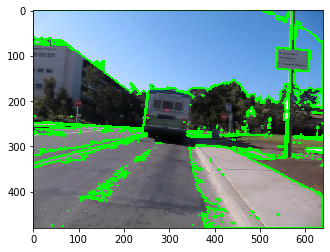

In [124]:
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
img_contours = cv2.imread(filename, cv2.IMREAD_COLOR)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
img_contours = cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB)
plt.imshow(img_contours)

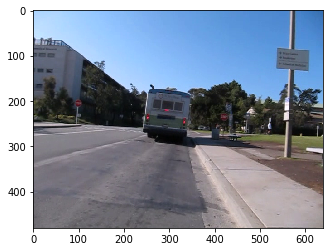

In [126]:
img_contours = cv2.imread(filename, cv2.IMREAD_COLOR)
for cnt in contours : 
    area = cv2.contourArea(cnt) 
   
    # Shortlisting the regions based on there area. 
    if area > 400:  
        approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True) 
        # Checking if the no. of sides of the selected region is 7. 
        if(len(approx) == 22):  
            cv2.drawContours(img_contours, [approx], 0, (0, 0, 255), 5) 

img_contours = cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB)
plt.imshow(img_contours)